# Artigo 5 - Construindo Um Modelo Linear e Uma Rede Neural do Início

## Autor

- **Levi de Oliveira Queiroz**
- **Matrícula: 170108341**
- **GitHub: LeviQ27**

## Objetivo

O objetivo do presente trabalho é aplicar os estudo feito na lição 5 do *fast.ai* - *From-scratch model*, em que foi estudado como criar na mão modelo linear e uma rede neural. Na lição o autor utiliza do dataset da competição *Titanic - Machine Learning from Disaster* para poder treinar o modelo e criar uma rede neural. No caso do presente trabalho foi utilizado o dataset da competição *Binary Classification with a Tabular Stroke Prediction Dataset* para poder aplicar os comandos e lógicas da lição 5.

## Inferência

Como parte do escopo do artigo, segue as referências do curos de Aprendizagem de Máquina do *fast.ai*, a referência do link do *kaggle* da competição do titanic e da competição da classificação binária de AVC.

- Curso *fast.ai* Capítulo 5: (https://course.fast.ai/Lessons/lesson5.html)
- Kaggle *Titanic - Machine Learning from Disaster* competition: (https://www.kaggle.com/competitions/titanic/data)
- Kaggle *Binary Classification with a Tabular Stroke Prediction Dataset* competition: (https://www.kaggle.com/competitions/playground-series-s3e2/overview)

## Desenvolvimento

Para o presente projeto, como o objetivo é construir um modelo liner e uma rede neral, foi seguido os passo a passo para poder produzir um modelo linear e criar uma rede neural, iniciando pela identificação do *path*:

In [ ]:
import os
from pathlib import Path

iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')
if iskaggle: path = Path('../input/playground-series-s3e2')
else:
    path = Path('playground-series-s3e2')
    if not path.exists():
        import zipfile,kaggle
        kaggle.api.competition_download_cli(str(path))
        zipfile.ZipFile(f'{path}.zip').extractall(path)

Trazendo o *torch*, *numpy* e *pandas*:

In [2]:
import torch, numpy as np, pandas as pd
np.set_printoptions(linewidth=140)
torch.set_printoptions(linewidth=140, sci_mode=False, edgeitems=7)
pd.set_option('display.width', 140)

E com o pandas, ler o arquivo de treino *.csv*:

In [3]:
df = pd.read_csv(path/'train.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15299,15299,Female,22.0,0,0,No,Govt_job,Urban,72.63,19.5,never smoked,0
15300,15300,Female,46.0,1,0,Yes,Private,Urban,101.19,32.1,never smoked,0
15301,15301,Female,75.0,0,0,Yes,Self-employed,Urban,87.69,26.2,never smoked,0
15302,15302,Male,46.0,0,0,Yes,Private,Rural,101.13,22.5,Unknown,0


Aqui eu olho se tem *NaN* (variável vazia) em alguma das minhas colunas:

In [4]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [5]:
modes = df.mode().iloc[0]
modes

id                              0
gender                     Female
age                          57.0
hypertension                  0.0
heart_disease                 0.0
ever_married                  Yes
work_type                 Private
Residence_type              Rural
avg_glucose_level           85.84
bmi                          23.4
smoking_status       never smoked
stroke                        0.0
Name: 0, dtype: object

In [6]:
df.fillna(modes, inplace=True)

In [7]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [8]:
import numpy as np

df.describe(include=(np.number))

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000
mean,7651.500000,41.417708,0.049726,0.023327,89.039853,28.112721,0.041296
std,4418.028595,21.444673,0.217384,0.150946,25.476102,6.722315,0.198981
min,0.000000,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,3825.750000,26.000000,0.000000,0.000000,74.900000,23.500000,0.000000
50%,7651.500000,43.000000,0.000000,0.000000,85.120000,27.600000,0.000000
75%,11477.250000,57.000000,0.000000,0.000000,96.980000,32.000000,0.000000
max,15303.000000,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000


<Axes: >

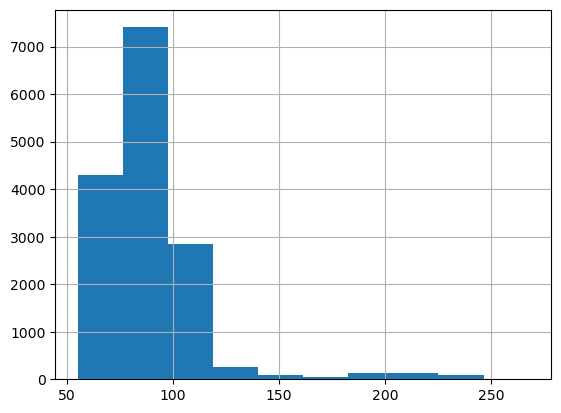

In [9]:
df['avg_glucose_level'].hist()

In [10]:
df['log_avg_glucose_level'] = np.log(df['avg_glucose_level']+1)

<Axes: >

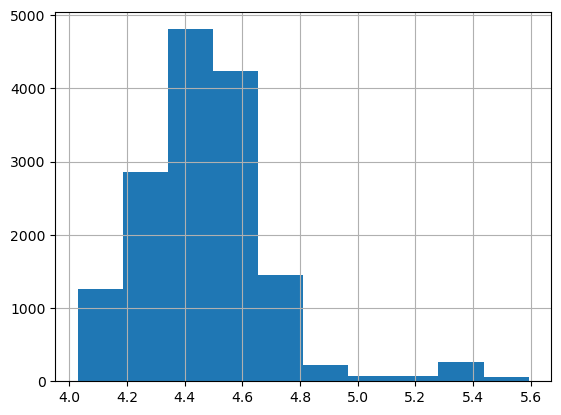

In [11]:
df['log_avg_glucose_level'].hist()

In [12]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,log_avg_glucose_level
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0,4.388630
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0,4.375002
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0,4.644391
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0,4.187683
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0,4.308918
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15299,15299,Female,22.0,0,0,No,Govt_job,Urban,72.63,19.5,never smoked,0,4.299053
15300,15300,Female,46.0,1,0,Yes,Private,Urban,101.19,32.1,never smoked,0,4.626834
15301,15301,Female,75.0,0,0,Yes,Self-employed,Urban,87.69,26.2,never smoked,0,4.485147
15302,15302,Male,46.0,0,0,Yes,Private,Rural,101.13,22.5,Unknown,0,4.626247


In [13]:
htension = sorted(df.hypertension.unique())
htension

[0, 1]

In [14]:
hdisease = sorted(df.heart_disease.unique())
hdisease

[0, 1]

In [15]:
df.describe(include=[object])

,gender,ever_married,work_type,Residence_type,smoking_status
count,15304,15304,15304,15304,15304
unique,3,2,5,2,4
top,Female,Yes,Private,Rural,never smoked
freq,9446,10385,9752,7664,6281


In [16]:
df = pd.get_dummies(df, columns=["gender","ever_married","work_type","Residence_type","smoking_status"])
df.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke', 'log_avg_glucose_level', 'gender_Female',
       'gender_Male', 'gender_Other', 'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural', 'Residence_type_Urban',
       'smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [17]:
added_cols = ['gender_Female', 'gender_Male', 'gender_Other', 'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural', 'Residence_type_Urban', 'smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']
df[added_cols].head()

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
2,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0
3,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
4,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0


In [18]:
from torch import tensor

t_dep = tensor(df.stroke)

In [19]:
indep_cols = ['id', 'age', 'hypertension', 'heart_disease', 'log_avg_glucose_level', 'bmi'] + added_cols

t_indep = tensor(df[indep_cols].values, dtype=torch.float)
t_indep

tensor([[    0.0000,    28.0000,     0.0000,     0.0000,     4.3886,    31.1000,     0.0000,  ...,     0.0000,     0.0000,     1.0000,
             0.0000,     0.0000,     1.0000,     0.0000],
        [    1.0000,    33.0000,     0.0000,     0.0000,     4.3750,    23.9000,     0.0000,  ...,     0.0000,     1.0000,     0.0000,
             0.0000,     1.0000,     0.0000,     0.0000],
        [    2.0000,    42.0000,     0.0000,     0.0000,     4.6444,    40.3000,     1.0000,  ...,     0.0000,     1.0000,     0.0000,
             1.0000,     0.0000,     0.0000,     0.0000],
        [    3.0000,    56.0000,     0.0000,     0.0000,     4.1877,    28.8000,     0.0000,  ...,     0.0000,     0.0000,     1.0000,
             0.0000,     0.0000,     1.0000,     0.0000],
        [    4.0000,    24.0000,     0.0000,     0.0000,     4.3089,    28.8000,     1.0000,  ...,     0.0000,     1.0000,     0.0000,
             0.0000,     0.0000,     1.0000,     0.0000],
        [    5.0000,    34.0000,   

In [20]:
t_indep.shape

torch.Size([15304, 22])

In [21]:
torch.manual_seed(442)

n_coeff = t_indep.shape[1]
coeffs = torch.rand(n_coeff)-0.5
coeffs

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,  0.2799, -0.4392,  0.2103,  0.3625,  0.1722,  0.2324,
        -0.3575, -0.0010, -0.1833, -0.2411,  0.0489,  0.0866, -0.0534,  0.3132])

In [22]:
t_indep*coeffs

tensor([[    -0.0000,      3.8802,      0.0000,     -0.0000,     -1.1553,     -9.7877,      0.0000,  ...,     -0.0000,     -0.0000,
             -0.2411,      0.0000,      0.0000,     -0.0534,      0.0000],
        [    -0.4629,      4.5731,      0.0000,     -0.0000,     -1.1517,     -7.5217,      0.0000,  ...,     -0.0000,     -0.1833,
             -0.0000,      0.0000,      0.0866,     -0.0000,      0.0000],
        [    -0.9258,      5.8203,      0.0000,     -0.0000,     -1.2226,    -12.6830,      0.4876,  ...,     -0.0000,     -0.1833,
             -0.0000,      0.0489,      0.0000,     -0.0000,      0.0000],
        [    -1.3887,      7.7604,      0.0000,     -0.0000,     -1.1024,     -9.0638,      0.0000,  ...,     -0.0000,     -0.0000,
             -0.2411,      0.0000,      0.0000,     -0.0534,      0.0000],
        [    -1.8516,      3.3259,      0.0000,     -0.0000,     -1.1343,     -9.0638,      0.4876,  ...,     -0.0000,     -0.1833,
             -0.0000,      0.0000,      

In [23]:
vals,indices = t_indep.max(dim=0)
t_indep = t_indep / vals

In [24]:
t_indep*coeffs

tensor([[    -0.0000,      0.0473,      0.0000,     -0.0000,     -0.2066,     -0.1222,      0.0000,  ...,     -0.0000,     -0.0000,
             -0.2411,      0.0000,      0.0000,     -0.0534,      0.0000],
        [    -0.0000,      0.0558,      0.0000,     -0.0000,     -0.2059,     -0.0939,      0.0000,  ...,     -0.0000,     -0.1833,
             -0.0000,      0.0000,      0.0866,     -0.0000,      0.0000],
        [    -0.0001,      0.0710,      0.0000,     -0.0000,     -0.2186,     -0.1583,      0.4876,  ...,     -0.0000,     -0.1833,
             -0.0000,      0.0489,      0.0000,     -0.0000,      0.0000],
        [    -0.0001,      0.0946,      0.0000,     -0.0000,     -0.1971,     -0.1132,      0.0000,  ...,     -0.0000,     -0.0000,
             -0.2411,      0.0000,      0.0000,     -0.0534,      0.0000],
        [    -0.0001,      0.0406,      0.0000,     -0.0000,     -0.2028,     -0.1132,      0.4876,  ...,     -0.0000,     -0.1833,
             -0.0000,      0.0000,      

In [25]:
preds = (t_indep*coeffs).sum(axis=1)

In [26]:
preds[:10]

tensor([ 0.1804,  0.4155,  0.4899,  0.2461, -0.2313,  0.4989,  0.4719, -0.3641,  0.4150,  0.7426])

In [27]:
loss = torch.abs(preds-t_dep).mean()
loss

tensor(0.4082)

In [28]:
def calc_preds(coeffs, indeps): return (indeps*coeffs).sum(axis=1)
def calc_loss(coeffs, indeps, deps): return torch.abs(calc_preds(coeffs, indeps)-deps).mean()

In [29]:
coeffs.requires_grad_()

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,  0.2799, -0.4392,  0.2103,  0.3625,  0.1722,  0.2324,
        -0.3575, -0.0010, -0.1833, -0.2411,  0.0489,  0.0866, -0.0534,  0.3132], requires_grad=True)

In [30]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss

tensor(0.4082, grad_fn=<MeanBackward0>)

In [31]:
loss.backward()

In [32]:
coeffs.grad

tensor([    -0.0588,      0.0791,      0.0138,     -0.0076,     -0.0250,      0.0092,      0.0436,     -0.0738,     -0.0001,     -0.3128,
             0.2826,      0.0627,     -0.0027,      0.1583,     -0.1152,     -0.1332,      0.0038,     -0.0340,     -0.1161,      0.0310,
            -0.0083,      0.0632])

In [33]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss.backward()
coeffs.grad

tensor([    -0.1176,      0.1581,      0.0276,     -0.0153,     -0.0499,      0.0184,      0.0873,     -0.1475,     -0.0001,     -0.6256,
             0.5652,      0.1253,     -0.0055,      0.3165,     -0.2304,     -0.2663,      0.0076,     -0.0680,     -0.2322,      0.0621,
            -0.0166,      0.1264])

In [34]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss.backward()
with torch.no_grad():
    coeffs.sub_(coeffs.grad * 0.1)
    coeffs.grad.zero_()
    print(calc_loss(coeffs, t_indep, t_dep))

tensor(0.3348)


In [35]:
from fastai.data.transforms import RandomSplitter
trn_split,val_split=RandomSplitter(seed=42)(df)

In [36]:
trn_indep,val_indep = t_indep[trn_split],t_indep[val_split]
trn_dep,val_dep = t_dep[trn_split],t_dep[val_split]
len(trn_indep),len(val_indep)

(12244, 3060)

In [37]:
def update_coeffs(coeffs, lr):
    coeffs.sub_(coeffs.grad * lr)
    coeffs.grad.zero_()

In [38]:
def one_epoch(coeffs, lr):
    loss = calc_loss(coeffs, trn_indep, trn_dep)
    loss.backward()
    with torch.no_grad(): update_coeffs(coeffs, lr)
    print(f"{loss:.3f}", end="; ")

In [39]:
def init_coeffs(): return (torch.rand(n_coeff)-0.5).requires_grad_()

In [40]:
def train_model(epochs=30, lr=0.01):
    torch.manual_seed(442)
    coeffs = init_coeffs()
    for i in range(epochs): one_epoch(coeffs, lr=lr)
    return coeffs

In [41]:
coeffs= train_model(18, lr=0.2)

0.409; 0.358; 0.309; 0.263; 0.223; 0.196; 0.179; 0.165; 0.155; 0.176; 0.355; 0.346; 0.406; 0.298; 0.432; 0.272; 0.448; 0.256; 

In [42]:
def show_coeffs(): return dict(zip(indep_cols, coeffs.requires_grad_(False)))
show_coeffs()

{'id': tensor(-0.1639),
 'age': tensor(0.1601),
 'hypertension': tensor(0.2015),
 'heart_disease': tensor(-0.1887),
 'log_avg_glucose_level': tensor(-0.1171),
 'bmi': tensor(-0.2640),
 'gender_Female': tensor(0.5082),
 'gender_Male': tensor(0.4689),
 'gender_Other': tensor(0.2800),
 'ever_married_No': tensor(-0.0701),
 'ever_married_Yes': tensor(0.0173),
 'work_type_Govt_job': tensor(0.1982),
 'work_type_Never_worked': tensor(0.1750),
 'work_type_Private': tensor(0.1773),
 'work_type_Self-employed': tensor(-0.0968),
 'work_type_children': tensor(0.1310),
 'Residence_type_Rural': tensor(-0.1207),
 'Residence_type_Urban': tensor(-0.1276),
 'smoking_status_Unknown': tensor(0.1454),
 'smoking_status_formerly smoked': tensor(0.1112),
 'smoking_status_never smoked': tensor(0.1382),
 'smoking_status_smokes': tensor(0.1766)}

In [43]:
preds = calc_preds(coeffs, val_indep)

In [44]:
results = val_dep.bool()==(preds>0.5)
results[:16]

tensor([False,  True, False,  True, False,  True,  True,  True, False, False,  True, False,  True, False,  True, False])

In [45]:
results.float().mean()

tensor(0.5990)

In [46]:
def acc(coeffs): return (val_dep.bool()==(calc_preds(coeffs, val_indep)>0.5)).float().mean()
acc(coeffs)

tensor(0.5990)

In [47]:
preds[:28]

tensor([0.6265, 0.3157, 0.5309, 0.4463, 0.6971, 0.3446, 0.4655, 0.2003, 0.2996, 0.5439, 0.4987, 0.5351, 0.3569, 0.5172, 0.4556, 0.5765,
        0.6652, 0.5595, 0.3023, 0.5321, 0.5693, 0.5357, 0.3903, 0.2626, 0.2476, 0.2645, 0.2176, 0.3272])

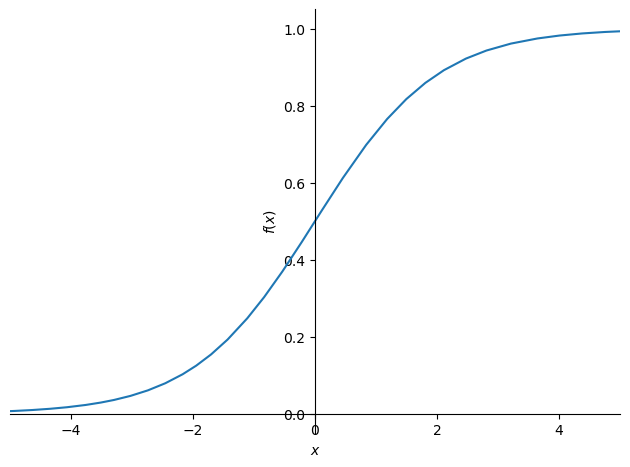

In [48]:
import sympy
sympy.plot("1/(1+exp(-x))", xlim=(-5,5));

In [49]:
def calc_preds(coeffs, indeps): return torch.sigmoid((indeps*coeffs).sum(axis=1))

In [50]:
coeffs = train_model(lr=100)

0.480; 0.041; 0.041; 0.041; 0.041; 0.041; 0.041; 0.041; 0.041; 0.041; 0.041; 0.041; 0.041; 0.041; 0.041; 0.041; 0.041; 0.041; 0.041; 0.041; 0.041; 0.041; 0.041; 0.041; 0.041; 0.041; 0.041; 0.041; 0.041; 0.041; 

In [51]:
acc(coeffs)

tensor(0.9592)

In [52]:
show_coeffs()

{'id': tensor(-11.3476),
 'age': tensor(-10.3629),
 'hypertension': tensor(-0.5658),
 'heart_disease': tensor(-0.6080),
 'log_avg_glucose_level': tensor(-17.6413),
 'bmi': tensor(-7.9430),
 'gender_Female': tensor(-13.0850),
 'gender_Male': tensor(-7.8961),
 'gender_Other': tensor(0.2782),
 'ever_married_No': tensor(-7.6118),
 'ever_married_Yes': tensor(-14.4011),
 'work_type_Govt_job': tensor(-1.8155),
 'work_type_Never_worked': tensor(0.1149),
 'work_type_Private': tensor(-13.8687),
 'work_type_Self-employed': tensor(-2.8749),
 'work_type_children': tensor(-2.9311),
 'Residence_type_Rural': tensor(-11.0845),
 'Residence_type_Urban': tensor(-11.1239),
 'smoking_status_Unknown': tensor(-6.4598),
 'smoking_status_formerly smoked': tensor(-3.0491),
 'smoking_status_never smoked': tensor(-9.2109),
 'smoking_status_smokes': tensor(-2.6689)}

In [53]:
tst_df = pd.read_csv(path/'test.csv')

In [55]:
tst_df.fillna(modes, inplace=True)
tst_df['log_avg_glucose_level'] = np.log(tst_df['avg_glucose_level']+1)
tst_df = pd.get_dummies(tst_df, columns=["gender","ever_married","work_type","Residence_type","smoking_status"])

tst_indep = tensor(tst_df[indep_cols].values, dtype=torch.float)
tst_indep = tst_indep / vals

In [58]:
tst_df['stroke'] = (calc_preds(tst_indep, coeffs)>0.5).int()

In [59]:
sub_df = tst_df[['id','stroke']]
sub_df.to_csv('sub.csv', index=False)

In [60]:
!head sub.csv

id,stroke
15304,0
15305,0
15306,0
15307,0
15308,0
15309,0
15310,0
15311,0
15312,0


In [61]:
(val_indep*coeffs).sum(axis=1)

tensor([-89.5800, -74.0101, -97.1883, -87.3796, -87.2879, -58.3597, -71.5841,  ..., -77.0712, -66.1495, -68.6787, -76.2618, -71.7102,
        -89.8423, -61.1455])

In [62]:
val_indep@coeffs

tensor([-89.5800, -74.0101, -97.1883, -87.3796, -87.2879, -58.3597, -71.5841,  ..., -77.0712, -66.1495, -68.6787, -76.2618, -71.7102,
        -89.8423, -61.1455])

In [68]:
def calc_preds(coeffs, indeps): return torch.sigmoid(indeps@coeffs)

In [64]:
def init_coeffs(): return (torch.rand(n_coeff, 1)*0.1).requires_grad_()

In [65]:
trn_dep = trn_dep[:,None]
val_dep = trn_dep[:,None]

In [69]:
coeffs = train_model(lr=100)

0.579; 0.041; 0.041; 0.041; 0.041; 0.041; 0.041; 0.041; 0.041; 0.041; 0.041; 0.041; 0.041; 0.041; 0.041; 0.041; 0.041; 0.041; 0.041; 0.041; 0.041; 0.041; 0.041; 0.041; 0.041; 0.041; 0.041; 0.041; 0.041; 0.041; 

In [70]:
acc(coeffs)

tensor(0.9586)

In [71]:
def init_coeffs(n_hidden=20):
    layer1 = (torch.rand(n_coeff, n_hidden)-0.5)/n_hidden
    layer2 = torch.rand(n_hidden, 1)-0.3
    const = torch.rand(1)[0]
    return layer1.requires_grad_(),layer2.requires_grad_(),const.requires_grad_()

In [72]:
import torch.nn.functional as F

def calc_preds(coeffs, indeps):
    l1,l2,const = coeffs
    res = F.relu(indeps@l1)
    res = res@l2 + const
    return torch.sigmoid(res)

In [73]:
def update_coeffs(coeffs, lr):
    for layer in coeffs:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

In [74]:
coeffs = train_model(lr=1.4)

0.561; 0.467; 0.337; 0.207; 0.118; 0.081; 0.067; 0.059; 0.055; 0.052; 0.050; 0.049; 0.048; 0.047; 0.047; 0.046; 0.046; 0.045; 0.045; 0.045; 0.044; 0.044; 0.044; 0.044; 0.044; 0.044; 0.043; 0.043; 0.043; 0.043; 

In [75]:
acc(coeffs)

tensor(0.9586)

## Conclusão

Como tive problemas em organização para construir o presente artigo, não pude construir um app *HuggingFace* que, ao colocar os dados do paciente, me dê a probabilidade desse paciente ter um AVC. Porém aprendi a construir um modelo liner e uma rede neural do zero e aplicá-lo à algum dado provindo do Kaggle. Os problemas foram, escolha errada do dataset, tentativa de criar o prórpio data set e escolha do dataset de Models de Carro que eu não sabia como aplicar os conceitos neste dataset.